<a href="https://colab.research.google.com/github/choidaesig/big_data_certificate/blob/main/%EC%9E%91%EC%97%85_1%EC%9C%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/youtube.csv",index_col=0)
df.head()

,title,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channelId,trending_date2
0,[신병] 물자창고,장삐쭈,23,1893473,38249,730,8595,UChbE5OZQ6dRHECsX0tEPEZQ,2021-01-01
1,RAIN(비) - 나로 바꾸자 Switch to me (duet with JYP) MV,RAIN's Official Channel,10,2600864,0,0,20129,UCxXgIeE5hxWxHG6dz9Scg2w,2021-01-01
2,2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.,서울시 · Seoul,29,347049,3564,120,178,UCZUPZW5idAxYp-Asj__lVAA,2021-01-01
3,고기남자의 칠면조 파티,고기남자 MeatMan,26,528458,15372,280,3470,UCT3CumbFIJiW33uq0UI3zlg,2021-01-01
4,골목 3mc를 분노하게 만든 마음고생이 심했을 공릉 백반집 사장님의 푸념?! [예능...,스브스밥집,24,494904,3918,111,3142,UCdWgRSfttvDucq4ApcCg5Mw,2021-01-01


In [ ]:
#인기동영상 제작횟수가 많은 채널 상위 10개명을 출력하라 (날짜기준, 중복포함)

list(df.loc[df.channelId	.isin(df.channelId.value_counts().head(10).index)].channelTitle.unique())

['장삐쭈',
 '총몇명',
 '파뿌리',
 '짤툰',
 '런닝맨 - 스브스 공식 채널',
 '엠뚜루마뚜루 : MBC 공식 종합 채널',
 'SPOTV',
 '채널 십오야',
 '이과장',
 'BANGTANTV']

In [ ]:
# 논란으로 인기동영상이 된 케이스를 확인하고 싶다. dislikes수가 like 수보다 높은 동영상을 제작한 채널을 모두 출력하라

list(df[df.dislikes >= df.likes].channelTitle.unique())

["RAIN's Official Channel",
 'STARNEWS KOREA',
 '김숙티비kimsookTV',
 '베러심플_Better simple',
 'GQ KOREA',
 '핫도그TV',
 '[Nareum_TV] 나름TV',
 '파이널판타지14',
 '모비딕 Mobidic',
 'Samsung',
 'SBS Radio 에라오',
 'ASMR 애정TV',
 'TOHO animation チャンネル',
 'JINI YUM',
 '[Dorothy]도로시',
 '하얀트리HayanTree',
 '박병일의 명장본색',
 '꿀주부 Honeyjubu',
 '양팡 YangPang',
 '철구형 (CHULTUBE)',
 'SuperM',
 '왜냐맨하우스',
 'NewsInStar',
 'THE BOYZ',
 '스튜디오 와플 - STUDIO WAFFLE',
 '망구 MANGOO',
 'LCK',
 'Brave Girls',
 'Brave Girls 브레이브걸스',
 'GoogleDoodles',
 '이루리 ILULIY',
 '이데일리 edaily',
 '(MUTUBE)와꾸대장봉준',
 '오메킴TV',
 'OH MY GIRL',
 '육지담',
 'MapleStory_KR',
 'ROAD FIGHTING CHAMPIONSHIP',
 '여정을떠난여정',
 '사나이 김기훈',
 '수리키친Suri',
 '조여사전성시대',
 'YouTube',
 '허스토리 KBS',
 'Brave Entertainment',
 'BTOB 비투비 (Official YouTube Channel)',
 '나혼자산다 STUDIO',
 '대한민국공군',
 'Gen.G esports',
 '머몌밈',
 'Mnet TV',
 '골프존',
 '모스트콘텐츠 MOSTCONTENTS',
 '한국닌텐도 공식 채널']

In [ ]:
#채널명을 바꾼 케이스가 있는지 확인하고 싶다. channelId의 경우 고유값이므로 이를 통해 채널명을 한번이라도 바꾼 채널의 갯수를 구하여라

change=df[['channelTitle','channelId']].drop_duplicates().channelId.value_counts()
target = change[change>1]
print(len(target))

71


In [ ]:
#일요일에 인기있었던 영상들중 가장많은 영상 종류(categoryId)는 무엇인가?

df['trending_date2'] = pd.to_datetime(df['trending_date2'])
df.loc[df['trending_date2'].dt.day_name()=='Sunday'].categoryId.value_counts().index[0]

24

In [ ]:
group=df.groupby([df['trending_date2'].dt.day_name(),'categoryId'],as_index=False).size()
group.pivot(index='categoryId',columns='trending_date2')

size                                                  
trending_date2 Friday Monday Saturday Sunday Thursday Tuesday Wednesday
categoryId                                                             
1                 243    263      255    274      246     257       234
2                 120    105      119     99      128     119       129
10                833    837      776    830      890     894       917
15                187    215      198    217      207     208       207
17                633    668      592    636      682     708       706
19                 90     92       87     91       92      89        85
20                283    298      296    289      282     285       291
22               1288   1373     1289   1337     1341    1375      1333
23                568    594      570    556      560     569       566
24               2976   3148     3066   3096     2954    3084      3090
25                444    453      422    437      470     452       468
26                369    378      364    363      375     394       385
27                183    205      183    199      194     194       212
28                171    160      173    167      166     161       165
29                 12     10       10      9       13      11        12

In [ ]:
(df[df.comment_count > df.view_count].title.unique())

array(['Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020'], dtype=object)

In [ ]:
target2=df.loc[df.view_count!=0]
t=target2.copy()
t['ratio']=(target2['comment_count']/target2['view_count']).dropna()
t.sort_values(by='ratio',ascending=False).iloc[0].title

'60분 동안 댓글이 달리지 않으면, 영상이 삭제됩니다. (챌린지)'

In [ ]:
df['view_ratio']=(df.comment_count)/(df.view_count).dropna()
df.sort_values(by='view_ratio',ascending=False).iloc[0].title


'Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020'

Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts


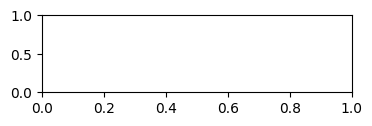

In [ ]:
ratio = (df['comment_count'] / df['view_count']).dropna().sort_values()
ratio[ratio!=0].index[0]

result=df.iloc[ratio[ratio!=0].index[0]].title
print(result)

In [ ]:
target=df.loc[(df.likes !=0)& (df.dislikes!=0)]
num=(target['dislikes']/target['likes']).sort_values().index[0]

df.iloc[num].title

'[줌터뷰] *최초공개* 사부작즈🐰🐶의 비공식 이름은 아이라인즈? 꿀조합 티키타카 가득한 NCT 127 도영&정우의 줌터뷰'

In [ ]:
df.columns

Index(['title', 'channelTitle', 'categoryId', 'view_count', 'likes',
       'dislikes', 'comment_count', 'channelId', 'trending_date2',
       'view_ratio'],
      dtype='object')

In [ ]:
df.loc[df.channelId==df.channelId.value_counts().index[0]].channelTitle.unique()

array(['짤툰'], dtype=object)

In [ ]:
(df[['title','channelId']].value_counts()>=20).sum()

40

In [ ]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(channel.head())
display(video.head())

,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


In [ ]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')
display(channel.head())
display(video.head())


,channelid,subcnt,viewcnt,videocnt,ct,channelname
0,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,410238653,736,2021-09-30 03:01:03,꽈뚜룹
1,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,736,2021-09-30 09:01:03,꽈뚜룹
2,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,735,2021-09-30 15:01:03,꽈뚜룹
3,UCkQCwnkQfgSuPTTnw_Y7v7w,1310000,412531322,737,2021-09-30 21:01:03,꽈뚜룹
4,UCkQCwnkQfgSuPTTnw_Y7v7w,1320000,412531322,737,2021-10-01 03:01:04,꽈뚜룹


,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
0,c5JQp6xafqc,1667010,30474,706,0,6587,2021-10-10 15:20:03,공범 EP1
1,c5JQp6xafqc,1669089,30495,707,0,6589,2021-10-10 15:30:03,공범 EP1
2,c5JQp6xafqc,1674759,30522,711,0,6596,2021-10-10 15:40:02,공범 EP1
3,c5JQp6xafqc,1677026,30555,712,0,6604,2021-10-10 15:50:03,공범 EP1
4,c5JQp6xafqc,1681824,30585,713,0,6600,2021-10-10 16:00:03,공범 EP1


In [ ]:
video['ct']=pd.to_datetime(video['ct'])
answer = video.videoname.value_counts()
print(answer)

videoname
 공범 EP1    3492
 공범 EP2    3204
 공범 EP3    2568
 공범 EP4    2280
 공범 EP5    1562
 공범 EP6    1274
 공범 EP7     555
 공범 EP8     266
Name: count, dtype: int64


In [ ]:
video[['viewcnt','videoname','ct']].drop_duplicates('videoname',keep='last').sort_values('ct',ascending=False).reset_index(drop=True)

,viewcnt,videoname,ct
0,1630200,공범 EP7,2021-11-01 15:30:05
1,1289088,공범 EP8,2021-11-01 15:30:05
2,1503435,공범 EP5,2021-11-01 15:30:04
3,1750222,공범 EP6,2021-11-01 15:30:04
4,3180532,공범 EP1,2021-11-01 15:30:03
5,2199328,공범 EP2,2021-11-01 15:30:03
6,1671294,공범 EP3,2021-11-01 15:30:03
7,1818493,공범 EP4,2021-11-01 15:30:03


In [ ]:
channel['ct']=pd.to_datetime(channel['ct'])
target=channel[channel.ct>='2021-10-03']
channel[['channelname','subcnt']].drop_duplicates(['channelname'],keep='first').reset_index(drop=True)

,channelname,subcnt
0,꽈뚜룹,1310000
1,야전삽짱재,257000
2,츄정ChuJeong,322000
3,논리왕 전기,923000
4,와글와글 WagleWagle,55000
5,조나단,215000
6,형사!탐정되다,14800
7,김농밀의 농밀한 삶,7510
8,릴펄 Lilpearl,9910
9,곽토리 kwak tori,471000


In [ ]:
channel['del']=channel[channel.ct['2021-10-03']-channel.ct['2021-11-01']]

channel[['channelname','del']]

KeyError: '2021-10-03'

In [ ]:
end=channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H')=='2021-11-01 15']
start=channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') == '2021-10-03 03']

end_df=end[['channelname','subcnt']].reset_index(drop=True)
start_df=start[['channelname','subcnt']].reset_index(drop=True)

end_df.columns=['channelname','end_sub']
start_df.columns = ['channelname','start_sub']

tt=pd.merge(start_df,end_df)
tt['del']=tt['end_sub']-tt['start_sub']
tt

,channelname,start_sub,end_sub,del
0,꽈뚜룹,1330000,1400000,70000
1,야전삽짱재,257000,268000,11000
2,츄정ChuJeong,322000,323000,1000
3,논리왕 전기,922000,911000,-11000
4,와글와글 WagleWagle,55000,55000,0
5,조나단,215000,227000,12000
6,형사!탐정되다,14900,25200,10300
7,김농밀의 농밀한 삶,7520,9060,1540
8,릴펄 Lilpearl,10100,21100,11000
9,곽토리 kwak tori,471000,469000,-2000


In [ ]:
import datetime

ep_one=video.loc[video.videoname.str.contains('1')].sort_values('ct').reset_index(drop=True)

ep_one[
        (ep_one.ct.diff(1) >=datetime.timedelta(minutes=20)) | \
    (ep_one.ct.diff(1) <= datetime.timedelta(minutes=5))
]
ep_one

answer = ep_one[ep_one.index.isin([720,721,722,723,1635,1636,1637])]
display(answer)

,videopk,viewcnt,likecnt,dislikecnt,favoritecnt,cmcnt,ct,videoname
720,c5JQp6xafqc,2153676,34104,830,0,7120,2021-10-12 19:20:03,공범 EP1
721,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
722,c5JQp6xafqc,2228250,34559,849,0,7191,2021-10-13 09:41:37,공범 EP1
723,c5JQp6xafqc,2228669,34566,849,0,7194,2021-10-13 09:50:03,공범 EP1
1635,c5JQp6xafqc,2706691,37893,987,0,7410,2021-10-19 17:50:02,공범 EP1
1636,c5JQp6xafqc,2707933,37901,988,0,7410,2021-10-19 18:20:03,공범 EP1
1637,c5JQp6xafqc,2708448,37903,988,0,7410,2021-10-19 18:30:03,공범 EP1


In [ ]:
video['time']=video.ct.dt.hour

In [ ]:
video[video.time==21][['videoname','viewcnt','ct']].sort_values('viewcnt').reset_index(drop=True).drop_duplicates('videoname')

,videoname,viewcnt,ct
0,공범 EP1,117340,2021-10-07 21:00:03
3,공범 EP3,147183,2021-10-14 21:00:04
5,공범 EP2,148144,2021-10-09 21:00:03
18,공범 EP5,201179,2021-10-21 21:00:04
20,공범 EP6,213899,2021-10-23 21:00:06
21,공범 EP4,217674,2021-10-16 21:00:04
29,공범 EP7,252032,2021-10-28 21:00:04
33,공범 EP8,264029,2021-10-30 21:00:08


In [ ]:
target=video.sort_values('ct').drop_duplicates('videoname',keep='last')
target['ratio']=target['dislikecnt']/target['likecnt']

target[['videoname','ratio']].sort_values('ratio').reset_index(drop=True)

,videoname,ratio
0,공범 EP7,0.013636
1,공범 EP6,0.015881
2,공범 EP4,0.017971
3,공범 EP5,0.021128
4,공범 EP3,0.022360
5,공범 EP1,0.027118
6,공범 EP2,0.029844
7,공범 EP8,0.141357


In [ ]:
start = pd.to_datetime("2021-11-01 00:00:00")
end = pd.to_datetime("2021-11-01 15:00:00")

target = video.loc[(video["ct"] >= start) & (video['ct'] <= end)].reset_index(drop=True)

def check(x):
    result = max(x) - min(x)
    return result

answer = target[['videoname','viewcnt']].groupby("videoname").agg(check)
answer

,viewcnt
videoname,
공범 EP1,13298
공범 EP2,10300
공범 EP3,9927
공범 EP4,9824
공범 EP5,10824
공범 EP6,14141
공범 EP7,26949
공범 EP8,89147


In [ ]:
ans=video[video.index.isin(set(video.index)-set(video.drop_duplicates().index))]
ans[['videoname','ct']]

,videoname,ct
722,공범 EP1,2021-10-13 09:41:37
3927,공범 EP2,2021-10-13 09:41:37


# 월드컵 출전선수 골기록 데이터

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [ ]:
gro=df.groupby('Country').sum().sort_values('Goals',ascending=False)
gro['Goals'].head()

Country
Brazil       228
Germany      226
Argentina    135
Italy        123
France       115
Name: Goals, dtype: int64

In [ ]:
df.groupby('Country').size().sort_values().tail(5)

Country
France       58
Argentina    59
Italy        60
Germany      78
Brazil       81
dtype: int64

In [ ]:
df['yearLst']=df.Years.str.split('-')

def checkFour(x):
  for value in (x):
    if len(str(value)) != 4:
      return False
  return True

df['check']=df['yearLst'].apply(checkFour)

result=len(df[df.check == False])
result

45

In [ ]:
df2=df[df.check==True].reset_index(drop=True)
print(df2.shape[0])

1250


In [ ]:
df2['LenCup']=df2['yearLst'].str.len()
df2['LenCup'].value_counts()[4]

16

In [ ]:
len(df2[(df2.Country=='Yugoslavia' )& (df2.LenCup==2)])

7

In [ ]:
len(df2[df2.Years.str.contains('2002')])

156

In [ ]:
len(df2[df2.Player.str.lower().str.contains('carlos')])

13

In [ ]:
df[df.LenCup==1].sort_values('Goals').Player.tail(1)

3    Just Fontaine
Name: Player, dtype: object

# 서울특별시

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


In [ ]:
df['대여일자'].value_counts().sort_index().to_frame()

,count
대여일자,
2021-06-01,48081
2021-06-02,56100
2021-06-03,18985
2021-06-04,56788
2021-06-05,52730
2021-06-06,47787
2021-06-07,52623
2021-06-08,55623
2021-06-09,54507


In [ ]:
df['대여일자']=pd.to_datetime(df['대여일자'])
df['day_name']=df['대여일자'].dt.day_name()

result=df.day_name.value_counts().to_frame()
print(result)

            count
day_name         
Wednesday  110607
Friday     108877
Monday     107568
Tuesday    103704
Saturday   101299
Sunday      90918
Thursday    55977


In [ ]:
result = df.groupby(['day_name','대여소번호']).size().to_frame('size').sort_values(['day_name','size'],ascending=False).reset_index()
ans=result.drop_duplicates('day_name',keep='first').reset_index(drop=True)
print(ans)

    day_name  대여소번호  size
0  Wednesday    502   282
1    Tuesday    502   267
2   Thursday   2715   137
3     Sunday    502   372
4   Saturday    502   378
5     Monday    502   242
6     Friday    502   277


In [ ]:
daily = df[df.대여구분코드.isin(['일일권','일일권(비회원)'])].연령대코드.value_counts().sort_index()
total = df.연령대코드.value_counts().sort_index()


ratio=(daily/total).sort_values(ascending=False)
print(ratio)

연령대코드
~10대    0.312525
20대     0.239913
30대     0.166702
40대     0.110585
50대     0.065414
70대~    0.048962
60대     0.042462
Name: count, dtype: float64


In [ ]:
result=df[['연령대코드','이동거리']].groupby(['연령대코드']).mean()
print(result)

              이동거리
연령대코드             
20대    3211.890552
30대    3341.443859
40대    3514.857416
50대    3593.668100
60대    3538.145737
70대~   3085.039641
~10대   2634.426279


In [ ]:
tw = df[df.연령대코드 =='20대'].reset_index(drop=True)
tw_mean = tw[tw.이동거리 >= tw.이동거리.mean()].reset_index(drop=True)
tw_mean['탄소량'] =tw_mean['탄소량'].astype('float')
target =tw_mean.sort_values(['대여일자','대여소번호'], ascending=False).reset_index(drop=True).iloc[:200].탄소량
result = round(target.sum()/len(target),3)
print(result)

1.613


In [ ]:
df['대여일자']=pd.to_datetime(df['대여일자'])
result=df[(df.연령대코드=='~10대') & (df.대여일자 == pd.to_datetime('2021-06-07'))].이용건수.median()
print(result)

1.0


In [ ]:
tar=df[(df.day_name.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & (df.대여시간.isin([6,7,8]))]
res=tar.groupby(['대여시간','대여소번호']).size().to_frame('이용 횟수')

ans=res.sort_values(['대여시간','이용 횟수'],ascending=False).groupby('대여시간').head(3)
print(ans)

            이용 횟수
대여시간 대여소번호       
8    2701     119
     646      115
     1152      92
7    259      104
     230       77
     726       77
6    2744      45
     1125      40
     1028      36


In [ ]:
df.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,day_name
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8,Tuesday
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19,Tuesday
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18,Tuesday
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75,Tuesday
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6,Tuesday


In [ ]:
df[df.이동거리 >= df.이동거리.mean()].이동거리.std()

5092.139707505356

In [ ]:
df['sex']=df['성별'].map(lambda x:'남' if x in ['M','m'] else '여')
df[['sex','이동거리']].groupby('sex').mean()

,이동거리
sex,
남,3209.110871
여,3468.575025


# 전세계 행복도 지표 데이터

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/happy2/happiness.csv',encoding='utf-8')
df.head()

,행복랭킹,나라명,점수,상대GDP,사회적지원,행복기대치,선택의 자유도,관대함,부패에 대한인식,년도
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [ ]:
df[df.행복랭킹==10]['점수'].mean()

7.259

In [ ]:
df[df.행복랭킹<=50][['년도','점수']].groupby('년도').mean()

,점수
년도,
2018,6.64678
2019,6.67002


In [ ]:
 #2018년도 데이터들만 추출하여 행복점수와 부패에 대한 인식에 대한 상관계수를 구하여라

df[df.년도 == 2018][['점수','부패에 대한인식']].corr().iloc[0,1]

0.40529152271510027

In [ ]:
result = len(df[['행복랭킹','나라명']]) - len(df[['행복랭킹','나라명']].drop_duplicates())
print(result)

15


In [ ]:
zz = df[df.년도 ==2019].corr().unstack().to_frame().reset_index().dropna()

result = zz[zz[0] !=1].sort_values(0,ascending=False).drop_duplicates(0)
answer = result.head(5).reset_index(drop=True)
answer.columns = ['v1','v2','corr']
display(answer)

ValueError: could not convert string to float: 'Finland'

In [ ]:
result = df.groupby('년도').tail(5).groupby('년도').mean()[['점수']]
print(result)

TypeError: Could not convert YemenTanzaniaSouth SudanCentral African RepublicBurundi to numeric

In [ ]:
over = df[df.상대GDP >= df.상대GDP.mean()]['점수'].mean()
under = df[df.상대GDP <= df.상대GDP.mean()]['점수'].mean()

result= over - under
print(over)
print(under)
print(result)

6.020120689655172
4.598905797101449
1.4212148925537234


In [ ]:
result = df.sort_values(['년도','부패에 대한인식'],ascending=False).groupby('년도').head(20).groupby(['년도']).mean()[['부패에 대한인식']]
print(result)

TypeError: Could not convert SingaporeRwandaDenmarkFinlandNew ZealandSwedenSwitzerlandNorwayLuxembourgIrelandAustraliaNetherlandsCanadaHong KongSomaliaGermanyIsraelUzbekistanBelgiumAustria to numeric

In [ ]:
result = set(df[(df.년도==2018)&(df.행복랭킹<=50)].나라명)-set(df[(df.년도==2019)&(df.행복랭킹 <=50)].나라명)
print(len(result))

4


In [ ]:
count=df.나라명.value_counts()
target= count[count>=2].index

df2=df.copy()
mult=df2[df2.나라명.isin(target)].reset_index(drop=True)
mult.loc[mult['년도']==2018,'점수']=mult[mult.년도==2018]['점수'].values*(-1)
res=mult.groupby('나라명').sum()['점수'].sort_values().to_frame().iloc[-1]
res

점수    0.87
Name: Burundi, dtype: float64

# 지역구 에너지 소비량 데이터


In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/consum/Tetuan%20City%20power%20consumption.csv')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
#DateTime컬럼을 통해 각 월별로 몇개의 데이터가 있는지 데이터 프레임으로 구하여라

df['DateTime']=pd.to_datetime(df['DateTime'])
result=df['DateTime'].dt.month.value_counts().sort_index().to_frame()
print(result)

          count
DateTime       
1          4464
2          4032
3          4464
4          4320
5          4464
6          4320
7          4464
8          4464
9          4320
10         4464
11         4320
12         4320


In [ ]:
# 3월달의 각 시간대별 온도의 평균들 중 가장 낮은 시간대의 온도를 출력하라
target=df[df.DateTime.dt.month==3]
target.groupby(target.DateTime.dt.hour)['Temperature'].mean().sort_values().values[0]

11.506612903225806

In [ ]:
target.groupby(target.DateTime.dt.hour)['Temperature'].mean().sort_values(ascending=False).values[0]

18.393602150537635

In [ ]:
df[df['Zone 1 Power Consumption'] >= df['Zone 2  Power Consumption']].Humidity.mean()

68.23624448055052

In [ ]:
df.iloc[:,-3:].corr()

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Zone 1 Power Consumption,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.750733,0.570932,1.000000


In [ ]:
def grade(x):
  if x<10:
    return "A"
  elif x<20:
    return "B"
  elif x<30:
    return "C"
  else:
    return "D"

df['grade']=df.Temperature.map(grade)
result=df['grade'].value_counts()
print(result)

grade
B    26993
C    21105
A     2874
D     1444
Name: count, dtype: int64


In [ ]:
df[(df.DateTime.dt.month==6)&(df.DateTime.dt.hour==12)].Temperature.std()

2.0499417827951025

In [ ]:
df[(df.DateTime.dt.month==6)&(df.DateTime.dt.hour==12)].Temperature.var()

4.202261312849163

In [ ]:
mid=df.Temperature.mean()
df[df.Temperature >= mid].sort_values('Temperature').Humidity.values[3]

87.9

In [ ]:
mid=df.Temperature.median()
df[df.Temperature >= mid].sort_values('Temperature').Humidity.values[3]

80.3

#포켓몬 정보 데이터

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#Legendary 컬럼은 전설포켓몬 유무를 나타낸다.전설포켓몬과 그렇지 않은 포켓몬들의 HP평균의 차이를 구하여라

target = df.groupby('Legendary')['HP'].mean()
target.values[1]-target.values[0]

25.55614861329147

In [ ]:
df.groupby('Type 2').count().sort_values('Total').tail(1).index[0]

'Flying'

In [ ]:
df['Type 2'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [ ]:
#가장 많은 Type 1 의 종의 평균 Attack 을 평균 Defense로 나눈값은?

max=df['Type 1'].value_counts().index[0]

df[df['Type 1']==max].Attack.mean() / df[df['Type 1']==max].Defense.mean()


1.0165238678090576

In [ ]:
df[df.Legendary==True].Generation.value_counts().index[0]

3

In [ ]:
target = df[[ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr().unstack().reset_index().rename(columns={0: "corr"})
result=target[target['corr']!=1].sort_values('corr',ascending=False).iloc[0]
print(result)

level_0     Sp. Def
level_1     Defense
corr       0.510747
Name: 26, dtype: object


In [ ]:
df.sort_values(['Generation','Attack']).groupby('Generation').head(3).Attack.mean()

19.5

In [ ]:
df.sort_values(['Generation','Attack'],ascending=False).groupby('Generation').head().Attack.mean()

157.23333333333332

In [ ]:
df[['Type 1','Type 2']].value_counts().head(1)

Type 1  Type 2
Normal  Flying    24
Name: count, dtype: int64

In [ ]:
tar=df[['Type 1','Type 2']].value_counts()
len(tar[tar==1])

39

In [ ]:
tt=df[['Type 1','Type 2']].value_counts()
tt2=(tt[tt==1])

lst=[]
for value in tt2.reset_index().values:
  t1=value[0]
  t2=value[1]

  sp = df[(df['Type 1']==t1)&(df['Type 2']==t2)]
  lst.append(sp)

pd.concat(lst).reset_index(drop=True).Generation.value_counts().sort_index()

Generation
1     1
2     4
3     5
4    13
5     7
6     9
Name: count, dtype: int64

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [ ]:
df.columns

Index(['측정나이', '측정회원성별', '신장 : cm', '체중 : kg', '체지방율 : %', '이완기혈압(최저) : mmHg',
       '수축기혈압(최고) : mmHg', '악력D : kg', '앉아윗몸앞으로굽히기 : cm', '교차윗몸일으키기 : 회',
       '제자리 멀리뛰기 : cm', '등급'],
      dtype='object')

In [ ]:
(df['수축기혈압(최고) : mmHg']-df['이완기혈압(최저) : mmHg']).mean()

52.19539414750672

In [ ]:
df[(df.측정나이 >= 50)&(df.측정나이<60)].iloc[:,2].mean()

164.07490107405314

In [ ]:
df['연령대']=df.측정나이 // 10 *10
res=df['연령대'].value_counts()
print(res)

연령대
20.0    5831
30.0    2660
40.0    1801
50.0    1769
60.0    1335
Name: count, dtype: int64


In [ ]:
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급,연령대
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C,50.0
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B,40.0
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B,20.0
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A,30.0
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C,20.0


In [ ]:
df.groupby(['연령대','등급'],as_index=False).size()

,연령대,등급,size
0,20.0,A,1585
1,20.0,B,1443
2,20.0,C,1455
3,20.0,D,1348
4,30.0,A,743
5,30.0,B,697
6,30.0,C,626
7,30.0,D,594
8,40.0,A,386
9,40.0,B,428


In [ ]:
abs(df[(df.측정회원성별 == 'M')&(df.등급 == 'A')].iloc[:,4].mean()-df[(df.측정회원성별=='M')&(df.등급=='D')].iloc[:,4].mean())

7.932086486137521

In [ ]:
abs(df[(df.측정회원성별 == 'F')&(df.등급 == 'A')].iloc[:,3].mean()-df[(df.측정회원성별=='F')&(df.등급=='D')].iloc[:,3].mean())

5.176211590296504

In [ ]:
df['bmi'] = df['체중 : kg'] / (df['신장 : cm']/100) ** 2
res=df[df.측정회원성별=='M'].bmi.mean()

In [ ]:
res

24.46134409819308

In [ ]:
df[(df['체지방율 : %']) >(df['bmi'])]['체중 : kg'].mean()

61.7408806392542

In [ ]:
target=df.groupby('측정회원성별')['악력D : kg'].mean()

res =target.M-target.F
print(res)

17.55954185047465


In [ ]:
df.columns

Index(['측정나이', '측정회원성별', '신장 : cm', '체중 : kg', '체지방율 : %', '이완기혈압(최저) : mmHg',
       '수축기혈압(최고) : mmHg', '악력D : kg', '앉아윗몸앞으로굽히기 : cm', '교차윗몸일으키기 : 회',
       '제자리 멀리뛰기 : cm', '등급', '연령대', 'bmi'],
      dtype='object')

In [ ]:
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급,연령대,bmi
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C,50.0,23.053061
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B,40.0,17.581601
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B,20.0,27.190328
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A,30.0,27.305324
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C,20.0,24.257046


In [ ]:
ans=df.groupby('측정회원성별')['교차윗몸일으키기 : 회'].mean()
ans.M - ans.F

14.243156833157627

# 기온 강수량 데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv")
df.head()

,time,이화동강수,이화동기온,수영동강수,수영동기온
0,2020-01-01 00:00:00,0.1,-3.9,0.0,2.5
1,2020-01-01 01:00:00,0.0,-3.1,0.0,3.4
2,2020-01-01 02:00:00,0.0,-1.8,0.0,3.8
3,2020-01-01 03:00:00,0.0,-0.8,0.0,4.6
4,2020-01-01 04:00:00,0.0,-0.1,0.0,5.1


In [ ]:
# 여름철(6월,7월,8월) 이화동이 수영동보다 높은 기온을 가진 시간대는 몇개인가?

df.time = pd.to_datetime(df.time)
summer=df.loc[df.time.dt.month.isin([6,7,8])].reset_index(drop=True)
answer=len(summer.loc[summer['이화동기온']>summer['수영동기온']])
print(answer)

1415


In [ ]:
answer1=df.loc[df['이화동강수']==df['이화동강수'].max()].time.values
answer2=df.loc[df['수영동강수']==df['수영동강수'].max()].time.values
print(answer1,answer2)

['2020-09-30T09:00:00.000000000'] ['2020-07-23T12:00:00.000000000']


# 서비스 이탈예측 데이터

In [ ]:
import pandas as pd
#데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6842,15793491,Cherkasova,714,Germany,Male,26,3,119545.48,2,1,0,65482.94,0
1,8963,15607874,Keane,687,France,Male,38,0,144450.58,1,0,1,137276.83,0
2,7047,15737627,Rivero,589,Germany,Female,20,2,121093.29,2,1,0,3529.72,0
3,7503,15697844,Whitehouse,721,Spain,Female,32,10,0.00,1,1,0,136119.96,1
4,3439,15722404,Carpenter,445,France,Female,30,3,0.00,2,1,1,127939.19,0


In [ ]:
df.loc[df.Gender=='Male'].groupby(['Geography']).sum().Exited.sort_values(ascending=False).head(1)

Geography
Germany    287
Name: Exited, dtype: int64

In [ ]:
# **카드를 소유(HasCrCard ==1)하고 있으면서 활성멤버(IsActiveMember ==1) 인
# 고객들의 평균 나이를 소숫점이하 4자리까지 구하여라? **

answer=df.loc[(df.HasCrCard==1)&(df.IsActiveMember==1)].Age.mean()
print(round(answer,4))

39.6102


In [ ]:
answer=df.loc[df.Balance >= df.Balance.median()].CreditScore.std()
round(answer,3)

97.295

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv")
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진수검여부,치아우식증유무,치석
0,F,55,145,55,73.0,0.7,0.5,1.0,1.0,129.0,...,12.9,1.0,0.9,172.0,209.0,15.0,0,Y,0.0,Y
1,M,40,180,55,74.0,1.5,1.5,1.0,1.0,102.0,...,15.6,1.0,0.8,30.0,19.0,23.0,1,Y,0.0,Y
2,F,55,150,50,72.0,1.0,0.2,1.0,1.0,116.0,...,14.1,1.0,1.0,31.0,19.0,10.0,0,Y,0.0,N
3,M,40,170,85,89.0,1.0,0.8,1.0,1.0,124.0,...,16.7,1.0,1.0,26.0,38.0,108.0,1,Y,1.0,Y
4,F,40,155,45,62.0,0.5,1.0,1.0,1.0,127.0,...,12.9,1.0,0.7,20.0,11.0,13.0,0,Y,0.0,N


In [ ]:
df['혈압차']=df['수축기혈압']-df['이완기혈압']
answer=df.groupby('연령대코드(5세단위)')['혈압차'].var().sort_values()
print(answer.index[-5])

60


In [ ]:
df['비만']=df['허리둘레']/df['신장(5Cm단위)']
data = df.loc[df['비만']>=0.58].성별코드.value_counts()
answer = data['M']/data['F']
print(answer)

1.1693877551020408


# 자동차 보험가입 예측데이터

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,188957,Female,25,1,17.0,1,< 1 Year,No,38785.0,152.0,59,0
1,275631,Male,20,1,22.0,0,< 1 Year,No,2630.0,160.0,113,0
2,329036,Female,40,1,41.0,0,1-2 Year,Yes,33165.0,124.0,188,0
3,227288,Female,28,1,30.0,1,< 1 Year,No,29038.0,152.0,233,0
4,300441,Female,50,1,28.0,0,1-2 Year,Yes,31325.0,124.0,258,0


In [ ]:
# vehicle_age에 따른 각 성별(gender)그룹의
# Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라

meand=df.groupby(['Gender','Vehicle_Age'],as_index=False)['Annual_Premium'].mean()
meand.pivot(index='Vehicle_Age',columns='Gender',values='Annual_Premium')

Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
answer =df[['price_range','n_cores']].groupby(['price_range','n_cores']).size().sort_values(0).groupby(level=0).tail(1)
answer

TypeError: Series.sort_values() takes 1 positional argument but 2 were given

In [ ]:
cordf = df.loc[df['price_range']==3].corr().unstack().sort_values(ascending=False)
answer = cordf.loc[cordf!=1].reset_index().iloc[1]
print(answer)

level_0          pc
level_1          fc
0          0.635166
Name: 1, dtype: object


# 비행탑승 경험 만족도 데이터

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,55882,Male,Loyal Customer,42,Business travel,Business,473,1,1,3,...,5,5,5,5,3,5,3,3,0.0,satisfied
1,31906,Female,Loyal Customer,31,Business travel,Business,3271,4,4,4,...,3,3,5,5,3,4,3,1,5.0,satisfied
2,85481,Male,Loyal Customer,51,Personal Travel,Eco,214,5,0,5,...,3,4,4,4,4,4,3,2,0.0,satisfied
3,102134,Male,Loyal Customer,44,Business travel,Business,3097,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
4,31580,Male,Loyal Customer,33,Business travel,Business,3286,1,1,1,...,4,2,5,2,5,1,4,0,0.0,satisfied


In [2]:
df.loc[df['Arrival Delay in Minutes'].isnull()].groupby(['Class','satisfaction'],as_index=False).size().pivot(index='Class',columns='satisfaction')

size          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                          36        76
Eco                              100        25
Eco Plus                          15         4

# 수질 음용성 여부 데이터

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.918150,214.186611,23823.492888,7.290878,341.173322,411.424483,19.585002,25.057375,4.028958,0
1,5.422446,205.266080,18542.957451,5.491963,306.702227,382.080129,10.504023,67.493450,2.911751,1
2,7.341547,187.672402,21273.457066,7.784003,NaN,332.084293,16.842334,55.019151,4.025644,0
3,9.056245,197.666301,17403.532167,7.688917,337.460176,414.766631,15.349869,63.696746,3.319354,0
4,5.039374,142.860598,40829.353167,7.271543,NaN,386.803057,16.823773,52.297113,4.957420,0


In [4]:
target= df.ph.dropna()
ans=target.loc[target <= target.quantile(0.25)].mean()
ans

5.057093462441731

In [5]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv")
train.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,39.330,0,no,northeast,14901.51670
1,47,female,27.830,0,yes,southeast,23065.42070
2,52,female,33.300,2,no,southwest,10806.83900
3,33,female,22.135,1,no,northeast,5354.07465
4,30,male,31.400,1,no,southwest,3659.34600


In [7]:
high=train.loc[train.smoker=='yes'].charges.quantile(0.9)
high2=train.loc[train.smoker=='no'].charges.quantile(0.9)
mean_yes=train.loc[(train.smoker=='yes')&(train.charges>=high)].charges.mean()
mean_no=train.loc[(train.smoker=='no')&(train.charges>=high2)].charges.mean()
print(mean_yes)
print(mean_no)

51282.763615714284
21984.80906755814


In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice//train.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8961990160,20150413T000000,567500.0,3,2.5,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
1,9455200205,20140604T000000,525000.0,3,2.0,1540,7800,1.0,0,0,...,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
2,7853220670,20140918T000000,540000.0,3,2.5,2860,8935,2.0,0,0,...,8,2860,0,2004,0,98065,47.5336,-121.855,2650,6167
3,3298201170,20141110T000000,350000.0,3,1.0,940,7811,1.0,0,0,...,6,940,0,1959,0,98008,47.6195,-122.118,1180,7490
4,7972604355,20140521T000000,218000.0,3,1.0,1020,7874,1.0,0,0,...,7,1020,0,1956,0,98106,47.5175,-122.346,1290,7320


In [10]:
df.loc[df.bedrooms==df.bedrooms.value_counts().index[0]].price.quantile(0.9)-df.loc[df.bedrooms==df.bedrooms.value_counts().index[0]].price.quantile(0.1)

505500.0

In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,246,328,110,4,4.0,2.5,9.02,1,0.81
1,100,323,113,3,4.0,4.0,8.88,1,0.79
2,79,296,95,2,3.0,2.0,7.54,1,0.44
3,53,334,116,4,4.0,3.0,8.00,1,0.78
4,444,321,114,5,4.5,4.5,9.16,1,0.87


In [12]:
from sklearn.ensemble import RandomForestRegressor

df_t = df.drop([df.columns[0]],axis=1)
x= df_t.drop([df.columns[-1]],axis=1)
y= df_t[df.columns[-1]]

ml=RandomForestRegressor()
ml.fit(x,y)
result=pd.DataFrame({'importance':ml.feature_importances_},x.columns).sort_values('importance',ascending=False)

In [13]:
result

,importance
CGPA,0.814460
GRE Score,0.084894
TOEFL Score,0.031389
SOP,0.024709
LOR,0.024292
University Rating,0.012369
Research,0.007887


In [14]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,20,F,NORMAL,NORMAL,9.281,4
1,24,M,HIGH,NORMAL,9.475,1
2,34,M,NORMAL,HIGH,22.456,0
3,17,M,NORMAL,NORMAL,10.832,4
4,72,M,LOW,HIGH,16.310,0


In [16]:
pre=df.loc[df.Sex=='M']
pre2=pre.copy()
pre2['Age2']=pre.Age//10 *10

pre2.groupby('Age2')['Na_to_K'].mean().to_frame()

,Na_to_K
Age2,
10,13.627000
20,18.260769
30,15.244143
40,13.897273
50,14.811273
60,14.284308
70,11.363857


In [17]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/train.csv")
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,14,4.53,0.6,2.718,87.93,0.6,52.758,92.46,5.0,...,0.4,0,0.2,0.0,4.0,108.362,0.4,0.5,21.6724,1
1,3.41,16,12.68,0.6,7.608,41.00,0.6,24.600,53.68,5.5,...,0.4,0,0.2,0.0,4.4,41.936,0.4,0.5,8.3872,1
2,2.72,11,3.11,0.6,1.866,113.97,0.6,68.382,117.08,5.5,...,0.4,0,0.2,0.0,4.4,88.832,0.4,0.5,17.7664,1
3,3.41,8,1.12,0.4,0.448,0.00,0.2,0.000,1.12,5.0,...,0.4,0,0.2,0.0,2.2,1.848,0.4,0.5,0.3696,0
4,55.57,9,1.06,0.4,0.424,0.00,0.2,0.000,1.06,5.0,...,0.4,0,0.2,0.0,2.2,1.824,0.4,0.5,0.3648,0


In [19]:
df.groupby('Risk')[['Score_A','Score_B']].mean()

,Score_A,Score_B
Risk,,
0,0.262234,0.225532
1,0.490164,0.444262


In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")
df.head()

,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,motion_9,...,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63,pose
0,-6.0,8.0,5.0,6.0,-12.0,-27.0,5.0,24.0,-8.0,-5.0,...,-1.0,-3.0,-6.0,-9.0,-7.0,36.0,68.0,3.0,-3.0,1
1,-32.0,-3.0,-4.0,-5.0,-1.0,16.0,0.0,-5.0,42.0,2.0,...,-17.0,-12.0,-1.0,-1.0,0.0,-26.0,-11.0,-4.0,-9.0,1
2,35.0,-2.0,-1.0,1.0,-25.0,-16.0,-3.0,-20.0,10.0,1.0,...,6.0,-65.0,6.0,-10.0,-31.0,-19.0,-3.0,-47.0,-17.0,0
3,-15.0,-6.0,-3.0,-5.0,27.0,37.0,-2.0,-2.0,19.0,5.0,...,2.0,11.0,0.0,-2.0,-4.0,-7.0,15.0,3.0,14.0,1
4,60.0,3.0,0.0,-7.0,-6.0,-10.0,-6.0,7.0,-11.0,-4.0,...,-12.0,17.0,-3.0,1.0,2.0,-2.0,20.0,18.0,10.0,0


In [22]:
t=df.groupby('pose').median().T
dfs=abs(t[0]-t[1]).sort_values().reset_index()
dfs[dfs[0]==dfs[0].max()]['index'].values

array(['motion_54', 'motion_62'], dtype=object)

In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Tucson,2016,12795,Manual,36263,Diesel,30,61.7,1.7
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
2,I30,2019,24000,Manual,555,Petrol,145,34.0,2.0
3,Tucson,2017,12995,Manual,32147,Diesel,30,61.7,1.7
4,Tucson,2018,14991,Semi-Auto,32217,Diesel,150,57.6,1.7


In [27]:
df.loc[df.model.isin(df.model.value_counts().index[:3])].groupby('model')['price'].mean().to_frame()

,price
model,
I10,7646.137891
I30,11651.821759
Tucson,15805.441373


In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,102,74,0,0,29.5,0.121,32,0
1,2,144,58,33,135,31.6,0.422,25,1
2,5,136,82,0,0,0.0,0.640,69,0
3,13,145,82,19,110,22.2,0.245,57,0
4,1,117,60,23,106,33.8,0.466,27,0


In [32]:
df.groupby('Outcome').mean().diff().iloc[1,:]

Pregnancies                  1.574159
Glucose                     29.943995
BloodPressure                3.202079
SkinThickness                2.952033
Insulin                     33.398645
BMI                          4.541437
DiabetesPedigreeFunction     0.143646
Age                          5.866939
Name: 1, dtype: float64

In [33]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [38]:
df['Date']=pd.to_datetime(df['Date'])

target=df.groupby(df['Date'].dt.strftime('%Y-%m')).mean()
answer=target.loc[target.index.str.contains('-05')].Open
print(answer)

Date
2002-05      1.155833
2003-05      1.641497
2004-05      4.261143
2005-05      1.951905
2006-05      4.163571
2007-05      3.159351
2008-05      4.435034
2009-05      5.790571
2010-05     14.417071
2011-05     34.650272
2012-05     10.523247
2013-05     31.936429
2014-05     51.121292
2015-05     85.057429
2016-05     92.705715
2017-05    158.255455
2018-05    329.779541
2019-05    359.664548
2020-05    433.880499
2021-05    496.923996
Name: Open, dtype: float64


In [40]:
pd.set_option('display.max_columns',50)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [41]:
round(df[df.Tm=='TOR'].Age.mean(),4)

24.8696

In [42]:
df[df.Age==df.Age.min()].Pos.value_counts().index[0]

'SG'

In [44]:
df['Player'].str.split().str[0].str.lower().value_counts().head(1)

Player
justin    14
Name: count, dtype: int64

In [45]:
df.groupby('Pos').PTS.mean()

Pos
C         7.690769
C-PF     12.850000
PF        7.737500
PF-SF     8.500000
PG        8.325161
PG-SG    22.000000
SF        7.270253
SF-SG     8.660000
SG        7.810553
SG-PG     9.525000
SG-SF     7.360000
Name: PTS, dtype: float64

In [49]:
df.sort_values(['Tm','G']).groupby('Tm').tail(1).G.mean()

77.51612903225806

In [51]:
df[(df.Tm=='MIA') & (df.Pos.isin(['C','PF']))].MP.mean()

16.7875

In [52]:
df[df.G>=df.G.mean()*1.5]['3P'].mean()

1.3853658536585365

In [53]:
df[df.Age >= df.Age.mean()].G.mean() -df[df.Age < df.Age.mean()].G.mean()

3.787674551781862

In [55]:
df.groupby('Tm')['Age'].mean().sort_values().index[0]

'MEM'

In [57]:
df.groupby('Pos')['MP'].mean()

Pos
C        16.990000
C-PF     25.350000
PF       17.937500
PF-SF    27.300000
PG       19.547742
PG-SG    37.200000
SF       17.514557
SF-SG    20.340000
SG       18.554271
SG-PG    22.950000
SG-SF    19.620000
Name: MP, dtype: float64